In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

In [2]:
df = pd.read_csv("../input/train.csv")

In [3]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [4]:
test = pd.read_csv(r'../input/test.csv')

In [5]:
test.isna().sum() #no nulls

ID                                  0
Loan Amount                         0
Funded Amount                       0
Funded Amount Investor              0
Term                                0
Batch Enrolled                      0
Interest Rate                       0
Grade                               0
Sub Grade                           0
Employment Duration                 0
Home Ownership                      0
Verification Status                 0
Payment Plan                        0
Loan Title                          0
Debit to Income                     0
Delinquency - two years             0
Inquires - six months               0
Open Account                        0
Public Record                       0
Revolving Balance                   0
Revolving Utilities                 0
Total Accounts                      0
Initial List Status                 0
Total Received Interest             0
Total Received Late Fee             0
Recoveries                          0
Collection R

In [6]:
df.isna().sum() #no nulls

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [7]:
df['Loan Status'].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

In [8]:
df.info() # No nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [9]:
X = df.copy()
y = X.pop("Loan Status")

In [10]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  int64  
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  int64  
 8   Sub Grade                     67463 non-null  int64  
 9   Employment Duration           67463 non-null  int64  
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  int64  
 12  Payment Plan                  67463 non-null  int64  
 13  L

In [12]:
discrete_features = X.dtypes == 'int64'

In [13]:
X.select_dtypes(include=['int64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   ID                            67463 non-null  int64
 1   Loan Amount                   67463 non-null  int64
 2   Funded Amount                 67463 non-null  int64
 3   Term                          67463 non-null  int64
 4   Batch Enrolled                67463 non-null  int64
 5   Grade                         67463 non-null  int64
 6   Sub Grade                     67463 non-null  int64
 7   Employment Duration           67463 non-null  int64
 8   Verification Status           67463 non-null  int64
 9   Payment Plan                  67463 non-null  int64
 10  Loan Title                    67463 non-null  int64
 11  Delinquency - two years       67463 non-null  int64
 12  Inquires - six months         67463 non-null  int64
 13  Open Account                  6

In [14]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


mi_score = MIC(X,y)
mi_score = pd.Series(mi_score,name="MI Scores",index = X.columns)
print(np.round(mi_score,decimals = 5))

In [15]:
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scores

ID                              3.083068e-01
Total Current Balance           2.855158e-01
Total Revolving Credit Limit    2.024669e-01
Loan Amount                     1.618864e-01
Funded Amount                   1.465563e-01
Revolving Balance               1.268529e-01
Total Collection Amount         1.296692e-02
Collection Recovery Fee         2.596732e-03
Revolving Utilities             1.631145e-03
Last week Pay                   1.361960e-03
Loan Title                      8.740340e-04
Total Received Interest         7.391339e-04
Total Accounts                  5.749817e-04
Debit to Income                 5.078711e-04
Recoveries                      4.254010e-04
Funded Amount Investor          3.625788e-04
Term                            3.006880e-04
Batch Enrolled                  2.978567e-04
Open Account                    2.752923e-04
Sub Grade                       2.466866e-04
Interest Rate                   1.454933e-04
Employment Duration             1.183201e-04
Grade     

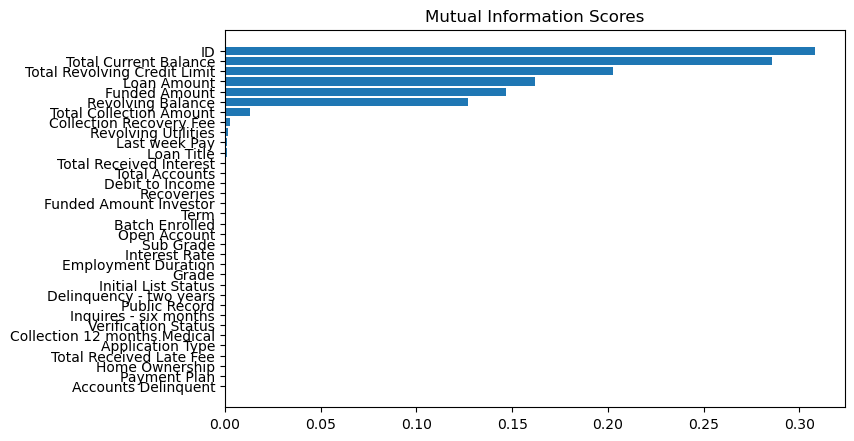

In [16]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [17]:
df.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [18]:
df['Revolving Balance']

0        24246
1          812
2         1843
3        13819
4         1544
         ...  
67458     4112
67459     9737
67460     2195
67461     1172
67462     8762
Name: Revolving Balance, Length: 67463, dtype: int64

In [22]:
def transformations(train,val,col,tr):
    if tr == 'log':
        train[col] = np.log(train[col])
        val[col] = np.log(val[col])
    elif tr == 'boxcox':
        train[col] = stats.boxcox(train[col])
        val[col] = stats.boxcox(val[col])

    elif tr == 'sqrt':
        train[col] = np.sqrt(train[col])
        val[col] = np.sqrt(val[col])


In [19]:
for i in df.select_dtypes(include=['int64','float64']):
    print(i)

ID
Loan Amount
Funded Amount
Funded Amount Investor
Term
Interest Rate
Home Ownership
Debit to Income
Delinquency - two years
Inquires - six months
Open Account
Public Record
Revolving Balance
Revolving Utilities
Total Accounts
Total Received Interest
Total Received Late Fee
Recoveries
Collection Recovery Fee
Collection 12 months Medical
Last week Pay
Accounts Delinquent
Total Collection Amount
Total Current Balance
Total Revolving Credit Limit
Loan Status


#df.select_dtypes(include=['int64','float64']).corr()
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

1. Loan Amount - Not normal, maybe bimodal, none of the transformations works
2.Funded amout - same, even horribly distributed


In [46]:
import scipy.stats as stats

In [47]:
def catcon(col,df):
    print(df[col].isna().sum())
    #print(df[col].value_counts())
    plt.hist(x=np.log(df[col]),bins='doane')
    #plt.hist((df[np.isfinite(df[col])].values),bins='fd')
    df.boxplot(by='Loan Status',column=[col])
    

0


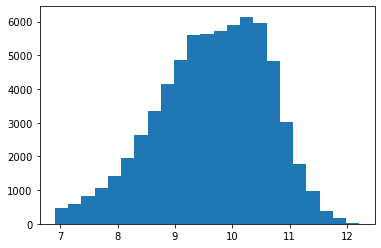

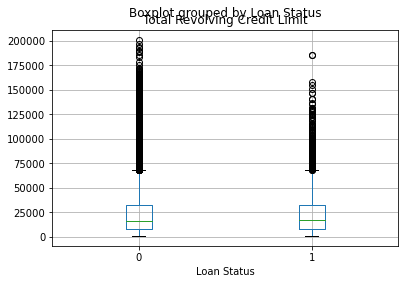

In [48]:
catcon('Total Revolving Credit Limit',df)

In [137]:
from sklearn.preprocessing import RobustScaler

In [130]:
FOLD_MAPPPING = {
    0: [1, 2, 3, 4],
    1: [0, 2, 3, 4],
    2: [0, 1, 3, 4],
    3: [0, 1, 2, 4],
    4: [0, 1, 2, 3]
}

In [133]:
df = pd.read_csv("../input/traincv.csv")
df_test = pd.read_csv("../input/test.csv")
train_df = df[df.kfold.isin(FOLD_MAPPPING.get(0))].reset_index(drop=True)
valid_df = df[df.kfold==0].reset_index(drop=True)

In [134]:
def transformations(train,val,col,tr):
    if tr == 'log':
        train[col] = np.log(train[col])
        val[col] = np.log(val[col])
    elif tr == 'boxcox':
        train[col] = stats.boxcox(train[col])
        val[col] = stats.boxcox(val[col])

    elif tr == 'sqrt':
        train[col] = np.sqrt(train[col])
        val[col] = np.sqrt(val[col])

In [136]:
transformations(train_df,valid_df,'Home Ownership','log')
transformations(train_df,valid_df,'Open Account','log')
transformations(train_df,valid_df,'Total Accounts','sqrt')
transformations(train_df,valid_df,'Total Received Interest','log')
transformations(train_df,valid_df,'Total Received Late Fee','log')
transformations(train_df,valid_df,'Recoveries','log')
transformations(train_df,valid_df,'Collection Recovery Fee','log')
#transformations(train_df,valid_df,'Total Collection Amount','boxcox')
transformations(train_df,valid_df,'Total Current Balance','log')
transformations(train_df,valid_df,'Total Revolving Credit Limit','log')

C:\Users\Vasuki.K\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [138]:
ytrain = train_df['Loan Status'].values
yvalid = valid_df['Loan Status'].values

train_df = train_df.drop(["ID", "Loan Status", "kfold"], axis=1)
valid_df = valid_df.drop(["ID", "Loan Status", "kfold"], axis=1)

valid_df = valid_df[train_df.columns]

label_encoders = {}
for c in train_df.columns:
    lbl = preprocessing.LabelEncoder()
    train_df.loc[:, c] = train_df.loc[:, c].astype(str).fillna("NONE")
    valid_df.loc[:, c] = valid_df.loc[:, c].astype(str).fillna("NONE")
    df_test.loc[:, c] = df_test.loc[:, c].astype(str).fillna("NONE")
    lbl.fit(train_df[c].values.tolist() + 
            valid_df[c].values.tolist() + 
            df_test[c].values.tolist())
    train_df.loc[:, c] = lbl.transform(train_df[c].values.tolist())
    valid_df.loc[:, c] = lbl.transform(valid_df[c].values.tolist())
    label_encoders[c] = lbl

In [139]:
train_df

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,21871,6582,55880,2,11,18790,1,15,0,56754,...,24836,54041,3768,0,0,14,0,1295,6549,14354
1,10137,23443,82718,2,36,57275,0,5,2,38783,...,24836,9416,42300,0,0,60,0,917,8747,53454
2,10032,5940,424,1,18,77044,1,5,0,22219,...,24836,4604,42300,0,0,153,0,2234,937,41344
3,26954,11189,37320,2,25,8778,3,19,0,26562,...,24836,7681,42300,0,0,143,0,2,29455,54983
4,756,2111,56631,1,0,26667,0,12,1,35093,...,24836,44244,42300,0,0,15,0,899,25356,53490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53965,3541,23650,23666,2,21,83148,2,3,0,49822,...,24836,61356,42300,0,0,128,0,2171,35786,7511
53966,28104,1053,36478,2,7,88814,2,7,2,34735,...,24836,6919,3012,0,0,46,0,1747,216,44721
53967,5910,19291,17870,2,5,57125,0,27,0,8551,...,24836,43482,349,0,0,43,0,917,35029,11393
53968,6602,21880,49565,2,14,31314,3,22,1,56060,...,24836,15792,42300,0,0,133,0,2363,52308,9942
